# W207 Final Project - Predict the Sale Price of a Property

### Surya Gutta, Ian Anderson, Allison Godfrey, and Jacky Ma


### Table of Contents  

&nbsp;**1. [Problem Statement](#ProblemStatement)**  
&nbsp;**2. [EDA and Feature Engineering](#eda)**  
&nbsp;&nbsp;&nbsp;2.1 [Missing Values & Encoding](#MissingValuesAndEncoding)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1.1 [Replace Missing Data](#ReplaceMissingData)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1.2 [Data Encoding](#DataEncoding)  
&nbsp;&nbsp;&nbsp;2.2 [Correlation Analysis](#CorrelationAnalysis)  
&nbsp;&nbsp;&nbsp;2.3 [Distributions](#Distributions)  
&nbsp;&nbsp;&nbsp;2.4 [Target Feature (*SalePrice*) Analysis](#TargetFeatureAnalysis)  
&nbsp;&nbsp;&nbsp;2.5 [Target Feature (*SalePrice*) Vs. Predictors Analysys](#TargetFeatureVsPredictors)   
&nbsp;&nbsp;&nbsp;&nbsp;2.5.1 [Specific Feature Analysys](#SpecificFeatureAnalysys)  
&nbsp;&nbsp;&nbsp;2.6 [Columns Exclusion](#ColumnsExclusion)  
&nbsp;&nbsp;&nbsp;2.7 [Outliers Exclusion](#OutliersExclusion)  
&nbsp;&nbsp;&nbsp;2.8 [Data Split](#DataSplit)  
&nbsp;&nbsp;&nbsp;2.9 [Feature Selection](#FeatureSelection)  
&nbsp;**3. [Model Building](#ModelBuilding)**  
&nbsp;&nbsp;&nbsp;3.1 [Data Leak Analysys](#DataLeakAnalysis)  
&nbsp;&nbsp;&nbsp;3.2 [Regression Models](#RegressionModels)  
&nbsp;&nbsp;&nbsp;3.3 [Model Fitting](#ModelFitting)  
&nbsp;&nbsp;&nbsp;3.4 [Blended Model](#BlendedModel)  
&nbsp;&nbsp;&nbsp;3.5 [Models Comparison](#ModelsComparison)  
&nbsp;&nbsp;&nbsp;3.6 [Predict Home Prices](#PredictHomePrices)  
&nbsp;**4. [Summary](#Summary)**  
&nbsp;**5. [References](#References)**  


### 1. Problem Statement<a name="ProblemStatement"></a>

The [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition using Advanced Regression Techniquesis is based on [Ames Housing dataset](http://www.amstat.org/publications/jse/v19n3/decock.pdf). The goal of this project is to predict sale price of homes on the given training and test data sets. 

We will be using machine learning approaches to try to most accurately predict home price based on relevant features. Our approach to this problem will be first to explore the data through our EDA which will help us to extract the most relevant features. Then apply different machine learning models with various regularization strengths to assess the accuracies, evaluate and compare the errors, update the models and features as needed and choose the best model accordingly.  

The main components of our notebook are: 
1. EDA and Feature Engineering
    - Univariate and Bivariate analysis of explanatory features
    - Replace missing values
    - Encode categorical features
    - Transform features
    - Outlier analysis
    - Exclusion of Columns
    - Data split - train and dev data sets    
2. Machine Learning Models Building
    - Bayesian Ridge Regression
    - Lasso Model
    - Bayesian ARD Regression
    - Elastic Net Regressor
    - Theil-Sen Estimator
    - Ordinary Least Squares Linear Regression
    - Random Forest Regressor
    - XGB Regressor
    - Ada Boost Regressor
3. Assessment

### 2. Exploratory Data Analysis & Feature Engineering<a name="eda"></a>

In [774]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
import xgboost as xgb
from sklearn.model_selection import KFold,train_test_split
#Set default matplotlib style to seaborn
mpl.style.use('seaborn-darkgrid')
base_color='#436BAD'
red_color='#990000'

In [775]:
np.random.seed(123)
# Load Data
pd.options.display.width=None
pd.options.display.max_columns = None
#Train data
train = pd.read_csv('./house-prices-data/train.csv',index_col=0)

#Test data
test = pd.read_csv('./house-prices-data/test.csv',index_col=0)

# Train data size
print("Train data shape: ", train.shape)

#Sample Train data
train.head()

Train data shape:  (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [776]:
# Test data size
print("Test data shape: ", test.shape)

#Sample Test data
test.head()

Test data shape:  (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Based on the above analysys, the [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) dataset contains the following:  
**Train data**: 80 features (including *SalePrice*) and 1460 observations.  
**Test data**:  79 features and 1459 observations.

#### 2.1 Missing Values & Encoding <a name="MissingValuesAndEncoding"></a>          

First, we need to get a clean picture of the percetage of missing values for each feature: 

              Count  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageType       81     5.55
GarageYrBlt      81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
GarageCond       81     5.55
BsmtExposure     38     2.60
BsmtFinType2     38     2.60
BsmtFinType1     37     2.53
BsmtCond         37     2.53
BsmtQual         37     2.53
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07


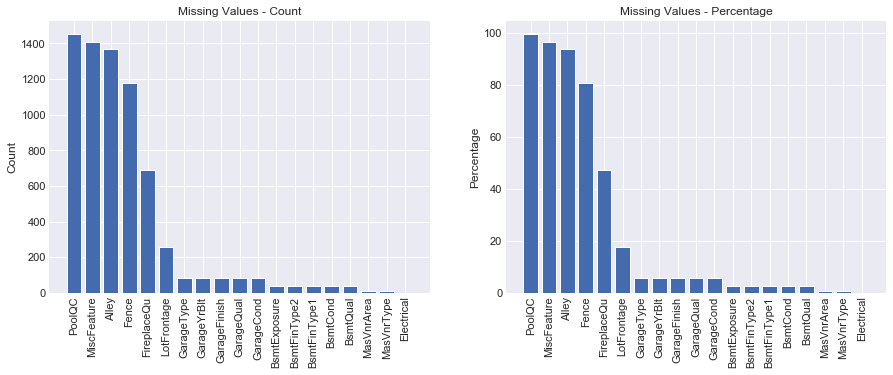

In [777]:
def missing_values(data):
    train_missing = data.isnull().sum()
    train_missing = pd.DataFrame(train_missing[train_missing > 0])
    train_missing.columns = ['Count']
    train_missing.sort_values(by='Count', ascending = False, inplace=True)
    train_missing['Percent'] = round((train_missing['Count'] /  len(train.index))* 100, 2) 
    plt.figure(figsize=(15, 5))   
    plt.subplot(1,2, 1)
    print(train_missing)
    plt.bar(train_missing.index,train_missing['Count'],color=base_color)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Missing Values - Count')
    plt.subplot(1,2, 2)
    plt.bar(train_missing.index,train_missing['Percent'],color=base_color)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')
    plt.title('Missing Values - Percentage')

missing_values(train)

It's evident that some of the features (*PoolQC, MiscFeature, Alley* etc.) are missing more than 50% of the values. Features that have a lot of missing data impacts our prediction models as they skew the means, variances, and correlations of our data.  

As we continue with our EDA, we will make a decision on how to deal with these features.

#### 2.1.1  Replace Missing Data<a name="ReplaceMissingData"></a> 

First, we want to simplify some of the features by creating the following new features:  
- *has_pool*
- *has_basement*
- *has_fireplace*
- *has_garage*
- *has_2ndflr*
- *has_remodel*
- *total_sf*
- *total_baths*
- *baths_above_gr*
- *beds_per_bath*
- *house_age*
- *remodel_age*
- *total_porch_sf*  
- *avg_room_size*

We want to include data that have a value > 0 for some features and combine data for some features based on their characteristics. 

In [778]:
# simplify features
def simplify_features(data):
    data['has_pool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    data['has_basement'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    data['has_fireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    data['has_garage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    data['has_2ndflr'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    data['has_remodel'] = np.where(data['YearRemodAdd'] == data['YearBuilt'], 0, 1)

    data['total_sf'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['total_baths'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])
    data['baths_above_gr'] = data['total_baths'] - (data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
    data['beds_per_bath'] =  np.where(data['baths_above_gr'] != 0, data['BedroomAbvGr'] / data['baths_above_gr'], 100)
    data['house_age'] = 2011 - data['YearBuilt'] # Recent built is 2010
    data['remodel_age'] = 2011 - data['YearRemodAdd']
    data['total_porch_sf'] = data['OpenPorchSF']+data['3SsnPorch']+data['EnclosedPorch']+data['ScreenPorch']+data['WoodDeckSF']
    data['avg_room_size'] = data['GrLivArea'] / data['TotRmsAbvGrd']
                                                                                                    
simplify_features(train)
simplify_features(test)

Create train_new and test_new with type modifications and fill missing numerical variables with 0 and categorical variables with NA.
<br> **Note**: We tried encoding missing categorical values as the mode and missing numerical values as the median, but our Kaggle score did not improve. Therefore, we encoded them as 0 or NA except in specified columns (mentioned later).
```
#fill missing object values with mode
for col in list(categorical_cols.columns):
    train_new[col].fillna(train_new[col].value_counts().index[0], inplace=True)  
    if (col != 'SalePrice'):
        test_new[col].fillna(test_new[col].value_counts().index[0], inplace=True)
    
#fill missing numerical values with median
for col in list(numerical_cols.columns):
    train_new[col].fillna(train_new[col].median(), inplace=True)
    if (col != 'SalePrice'):
        test_new[col].fillna(test_new[col].median(), inplace=True)
        
```

In [779]:
def formatCols(mylist, cols):
    lines = ("\t".join(mylist[i:i+cols]) for i in range(0,len(mylist),cols))
    return '\n'.join(lines)

train_new= train.copy(deep=True)
test_new= test.copy(deep=True)

# Change MSSubClass and MoSold from an int to string since the integer
# value doesn't actually represent a number, but rather a category (month and dwelling type)
train_new.MSSubClass = train_new.MSSubClass.astype('str')
train_new.MoSold = train_new.MoSold.astype('str')
train_new.YrSold = train_new.YrSold.astype('str')
test_new.MSSubClass = test_new.MSSubClass.astype('str')
test_new.MoSold = test_new.MoSold.astype('str')
test_new.YrSold = test_new.YrSold.astype('str')

# Numerical and Categorical (type=object) columns/features
numerical_cols = train_new.select_dtypes(exclude=['object'])
categorical_cols = train_new.select_dtypes(include=['object'])

print('Numeric columns info:')
print('Total:', len(numerical_cols.columns))
print(formatCols( numerical_cols.columns, 6))
print('\n')
print('Categorical columns info:')
print('Total:', len(categorical_cols.columns))
print(formatCols( categorical_cols.columns, 6))

#fill missing object values with NA
for col in list(categorical_cols.columns):
    train_new[col].fillna('NA', inplace=True)  
    if (col != 'SalePrice'):
        test_new[col].fillna('NA', inplace=True)
    
#fill missing numerical values with 0
for col in list(numerical_cols.columns):
    train_new[col].fillna(0, inplace=True)
    if (col != 'SalePrice'):
        test_new[col].fillna(0, inplace=True)

# fill NAs
train_new['LotFrontage'] = train_new['LotFrontage'].fillna(train_new['LotFrontage'].median())
test_new['LotFrontage'] = test_new['LotFrontage'].fillna(train_new['LotFrontage'].median())
        
#Re-initialize the columns with updated data
numerical_cols = train_new.select_dtypes(exclude=['object'])
categorical_cols = train_new.select_dtypes(include=['object'])

Numeric columns info:
Total: 48
LotFrontage	LotArea	OverallQual	OverallCond	YearBuilt	YearRemodAdd
MasVnrArea	BsmtFinSF1	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF	1stFlrSF
2ndFlrSF	LowQualFinSF	GrLivArea	BsmtFullBath	BsmtHalfBath	FullBath
HalfBath	BedroomAbvGr	KitchenAbvGr	TotRmsAbvGrd	Fireplaces	GarageYrBlt
GarageCars	GarageArea	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch
ScreenPorch	PoolArea	MiscVal	SalePrice	has_pool	has_basement
has_fireplace	has_garage	has_2ndflr	has_remodel	total_sf	total_baths
baths_above_gr	beds_per_bath	house_age	remodel_age	total_porch_sf	avg_room_size


Categorical columns info:
Total: 46
MSSubClass	MSZoning	Street	Alley	LotShape	LandContour
Utilities	LotConfig	LandSlope	Neighborhood	Condition1	Condition2
BldgType	HouseStyle	RoofStyle	RoofMatl	Exterior1st	Exterior2nd
MasVnrType	ExterQual	ExterCond	Foundation	BsmtQual	BsmtCond
BsmtExposure	BsmtFinType1	BsmtFinType2	Heating	HeatingQC	CentralAir
Electrical	KitchenQual	Functional	FireplaceQu	GarageType	GarageFinish
Ga

#### 2.1.2  Data Encoding<a name="DataEncoding"></a> 
The housing data set we are working with, unsurprisingly, includes data that is not numerical. The non-numerical data can be further classified into two types: ***Ordinal*** or ***Categorical***.  

The Ordinal data are categories which represent specific relative quantities such as low, medium, or high. Categorical data is simply a feature of a home such as roofing material or neighborhood. The categorical value does not in and of itself provide any insight into how it relates to other values in the same category. This distinction is important to consider for how we process these non-numeric columns.  

The ordinal data will be manually reassigned values in order to preserve the significance of the underlying value while hot encoding will be used to break the categories down into binary representations.

In [780]:
def convert_ordinals(data):
    default_odinal = {
        'Ex': 5,  # Excellent
        'Gd': 4,  # Good
        'TA': 3,  # Average/Typical
        'Fa': 2,  # Fair
        'Po': 1,  # Poor
        'NA': 3
    }

    # LotShape: General shape of property
    lot_shape = {
        'Reg': 4,  # Regular
        'IR1': 3,  # Slightly irregular
        'IR2': 2,  # Moderately Irregular
        'IR3': 1   # Irregular
    }
    data.LotShape = data.LotShape.map(lot_shape)

    # Utilities: Type of utilities available
    utilities = {
        'AllPub': 4, # All public Utilities (E,G,W,& S)
        'NoSewr': 3, # Electricity, Gas, and Water (Septic Tank)
        'NoSeWa': 2, # Electricity and Gas Only
        'ELO':    1  # Electricity only
    }
    data.Utilities = data.Utilities.map(utilities)

    # LandSlope: Slope of property
    land_slope = {
        'Gtl': 3,  # Gentle slope
        'Mod': 2,  # Moderate Slope
        'Sev': 1   # Severe Slope
    }
    data.LandSlope = data.LandSlope.map(land_slope)

    # ExterQual: Evaluates the quality of the material on the exterior 
    extern_qual = default_odinal
    data.ExterQual = data.ExterQual.map(extern_qual)

    # ExterCond: Evaluates the present condition of the material on the exterior
    extern_cond = default_odinal
    data.ExterCond = data.ExterCond.map(extern_cond)

    # BsmtCond: Evaluates the general condition of the basement
    bsmt_cond = {
        'Ex': 5,  # Excellent
        'Gd': 4,  # Good
        'TA': 3,  # Typical - slight dampness allowed
        'Fa': 2,  # Fair - dampness or some cracking or settling
        'Po': 1,  # Poor - Severe cracking, settling, or wetness
        'NA': 3   # No Basement but marking as typical since Fair/Poor may be worse
    }
    data.BsmtCond = data.BsmtCond.map(bsmt_cond)

    # BsmtExposure: Refers to walkout or garden level walls
    bsmt_exposure = {
        'Gd': 4,  # Good Exposure
        'Av': 3,  # Average Exposure (split levels or foyers typically score average or above)  
        'Mn': 2,  # Mimimum Exposure
        'No': 1,  # No Exposure
        'NA': 0   # No Basement
    }
    data.BsmtExposure = data.BsmtExposure.map(bsmt_exposure)

    # BsmtFinType1: Rating of basement finished area
    bsmt_fin_type1 = {
        'GLQ': 6,  # Good Living Quarters
        'ALQ': 5,  # Average Living Quarters
        'BLQ': 4,  # Below Average Living Quarters
        'Rec': 3,  # Average Rec Room
        'LwQ': 2,  # Low Quality
        'Unf': 1,  # Unfinshed
        'NA':  3   # No Basement
    }
    data.BsmtFinType1 = data.BsmtFinType1.map(bsmt_fin_type1)

    # BsmtFinType2: Rating of basement finished area (if multiple types)
    bsmt_fin_type2 = bsmt_fin_type1
    data.BsmtFinType2 = data.BsmtFinType2.map(bsmt_fin_type2)

    # HeatingQC: Heating quality and condition
    heating_qc = default_odinal
    data.HeatingQC = data.HeatingQC.map(heating_qc)

    # CentralAir: Central air conditioning
    central_air = {
        'N': 0,  # No
        'Y': 1   # Yes
    }
    data.CentralAir = data.CentralAir.map(central_air)

    # KitchenQual: Kitchen quality
    kitchen_qual = default_odinal
    data.KitchenQual = data.KitchenQual.map(kitchen_qual)

    # Functional: Home functionality (Assume typical unless deductions are warranted)
    functional = {
        'Typ':  8,  # Typical Functionality
        'Min1': 7,  # Minor Deductions 1
        'Min2': 6,  # Minor Deductions 2
        'Mod':  5,  # Moderate Deductions
        'Maj1': 4,  # Major Deductions 1
        'Maj2': 3,  # Major Deductions 2
        'Sev':  2,  # Severely Damaged
        'Sal':  1   # Salvage only
    }
    data.Functional = data.Functional.map(functional)

    # GarageFinish: Interior finish of the garage
    garage_finish = {
        'Fin': 3,  # Finished
        'RFn': 2,  # Rough Finished
        'Unf': 1,  # Unfinished
        'NA':  0   # No Garage
    }
    data.GarageFinish = data.GarageFinish.map(garage_finish)

    # GarageQual: Garage quality
    garage_qual = default_odinal
    data.GarageQual = data.GarageQual.map(garage_qual)

    # GarageCond: Garage condition
    garage_cond = default_odinal
    data.GarageCond = data.GarageCond.map(garage_cond)

    # PavedDrive: Paved driveway
    paved_drive = {
        'Y': 3,  # Paved 
        'P': 2,  # Partial Pavement
        'N': 1   # Dirt/Gravel
    }
    data.PavedDrive = data.PavedDrive.map(paved_drive)
    
convert_ordinals(train_new)
convert_ordinals(test_new)

In [781]:
train_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has_pool,has_basement,has_fireplace,has_garage,has_2ndflr,has_remodel,total_sf,total_baths,baths_above_gr,beds_per_bath,house_age,remodel_age,total_porch_sf,avg_room_size
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,4,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,Gd,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,NA,Attchd,2003.0,2,2,548,3,3,3,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500,0,1,0,1,1,0,2416,3.5,2.5,1.2,8,8,61,213.750000
2,20,RL,80.0,9600,Pave,NA,4,Lvl,4,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,Gd,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,TA,Attchd,1976.0,2,2,460,3,3,3,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500,0,1,1,1,0,0,2240,2.5,2.0,1.5,35,35,298,210.333333
3,60,RL,68.0,11250,Pave,NA,3,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,Gd,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,TA,Attchd,2001.0,2,2,608,3,3,3,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500,0,1,1,1,1,1,2272,3.5,2.5,1.2,10,9,42,297.666667
4,70,RL,60.0,9550,Pave,NA,3,Lvl,4,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,TA,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,Gd,Detchd,1998.0,1,3,642,3,3,3,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000,0,1,1,1,1,1,1933,2.0,1.0,3.0,96,41,307,245.285714
5,60,RL,84.0,14260,Pave,NA,3,Lvl,4,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,Gd,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,TA,Attchd,2000.0,2,3,836,3,3,3,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000,0,1,1,1,1,0,2853,3.5,2.5,1.6,11,11,276,244.222222


In [782]:
def hot_encode(data):
    categorical_cols = data.select_dtypes(include=['object'])
    return pd.get_dummies(data, columns = categorical_cols.columns)

test_new = hot_encode(test_new)
train_new = hot_encode(train_new)
train_new.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,has_pool,has_basement,has_fireplace,has_garage,has_2ndflr,has_remodel,total_sf,total_baths,baths_above_gr,beds_per_bath,house_age,remodel_age,total_porch_sf,avg_room_size,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_200

In [783]:
# Numerical columns/features after Hot Encoding
numerical_cols_hot_encode = train_new.select_dtypes(exclude=['object'])
print('Total Numeric columns after hot encoding:', len(numerical_cols_hot_encode.columns))

Total Numeric columns after hot encoding: 286


#### 2.2  Correlation Analysis<a name="CorrelationAnalysis"></a> 

The Correlation can be positive (increase in one value of feature increases the value of our target feature *SalePrice* or negative (increase in one value of feature decreases the value of our target feature *SalePrice*). We would like to identify which features are most strongly correlated with *SalePrice* (both positively and negatively) in order to begin feature selection.   

We need to be careful on multi-collinearity among our selected features as they may impact our results.  

Since, some of the variables have a non-linear relationship, we can measure the correlation using Spearman coefficient. 

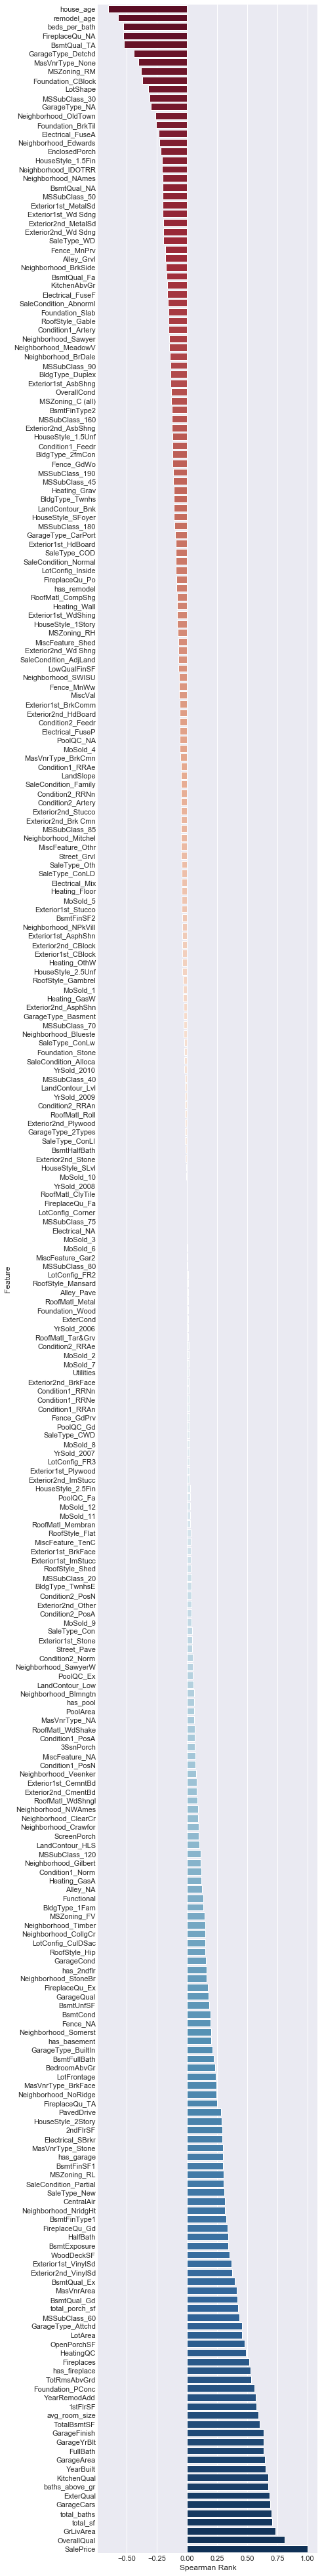

In [784]:
# Spearman's Rank
spearman_rank = pd.DataFrame()
spearman_rank['Feature'] = train_new.columns
spearman_rank['Spearman Rank'] = [train_new[f].corr(train_new['SalePrice'], 'spearman') for f in train_new.columns]
spearman_rank = spearman_rank.sort_values('Spearman Rank')
    
plt.figure(figsize=(6, 0.25*len(train_new.columns)))
sns.barplot(data=spearman_rank, y='Feature', x='Spearman Rank', orient='h', palette="RdBu")

Using the above plot, we can infer the following:  

**Positively correlated with** ***SalePrice***:*OverallQual, GrLivArea, total_sf, total_baths, GarageCars, ExterQual, KitchenQual, YearBuilt, GarageArea, FullBath, GarageYrBlt, GarageFinish, TotalBsmtSF, 1stFlrSF, YearRemodAdd, Foundation_PConc, TotRmsAbvGrd, has_fireplace, Fireplaces, HeatingQC, OpenPorchSF, LotArea, GarageType_Attchd, MSSubClass_60, Total_porch_sf, BSMtQual_Gd, MasVnrArea, BsmtQual_Ex, Exterior2nd_VinylSd, Exterior1st_VinylSd, WoodDeckSF, BsmtExposure,HalfBath, and FireplaceQu_Gd*  

**Negatively correlated with** ***SalePrice***:*HouseAge, FrieplaceQu_NA, BsmtQual_TA, GarageType_Detchd, MasVnrType_None, MSZoning_RM, Foundation_CBlock, and LotShape*

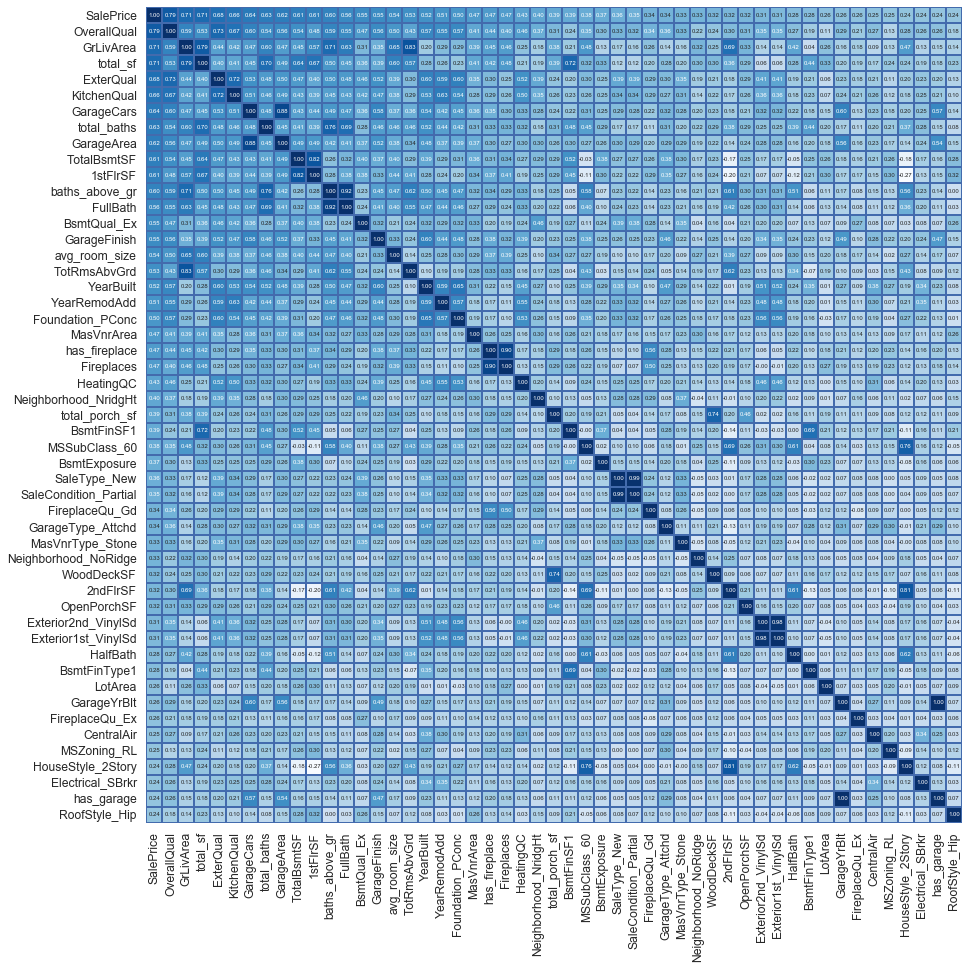

In [785]:
# Heat Map for largest 50 features
corr_matrix = train_new.corr()
high_corr_cols = corr_matrix.nlargest(51, 'SalePrice')['SalePrice'].index # Add 1 as it includes SalePrice
cm = np.corrcoef(train_new[high_corr_cols].values.T)
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(cm,annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 6}, yticklabels=high_corr_cols.values, 
                 xticklabels=high_corr_cols.values, ax = ax, cmap="Blues", linewidths=1, 
                 linecolor=base_color, cbar=False)
plt.show()

Using the above Heatmap, apart from positive and negative correlation with our target feature *SalePrice*, we can see (***multicollinearity***) among the predictor features. We need to be careful during the feature selection avoiding multicollinearity. For example, *TotRmsAbvGrd* is correlated with *GrLivArea* and *HouseStyle_2Story* is correlated with *MSSubClass_60*.

#### 2.3 Distributions<a name="Distributions"></a> 

Look at the distributions for each numerical feature in order to analyze any skews that may need log transforms.

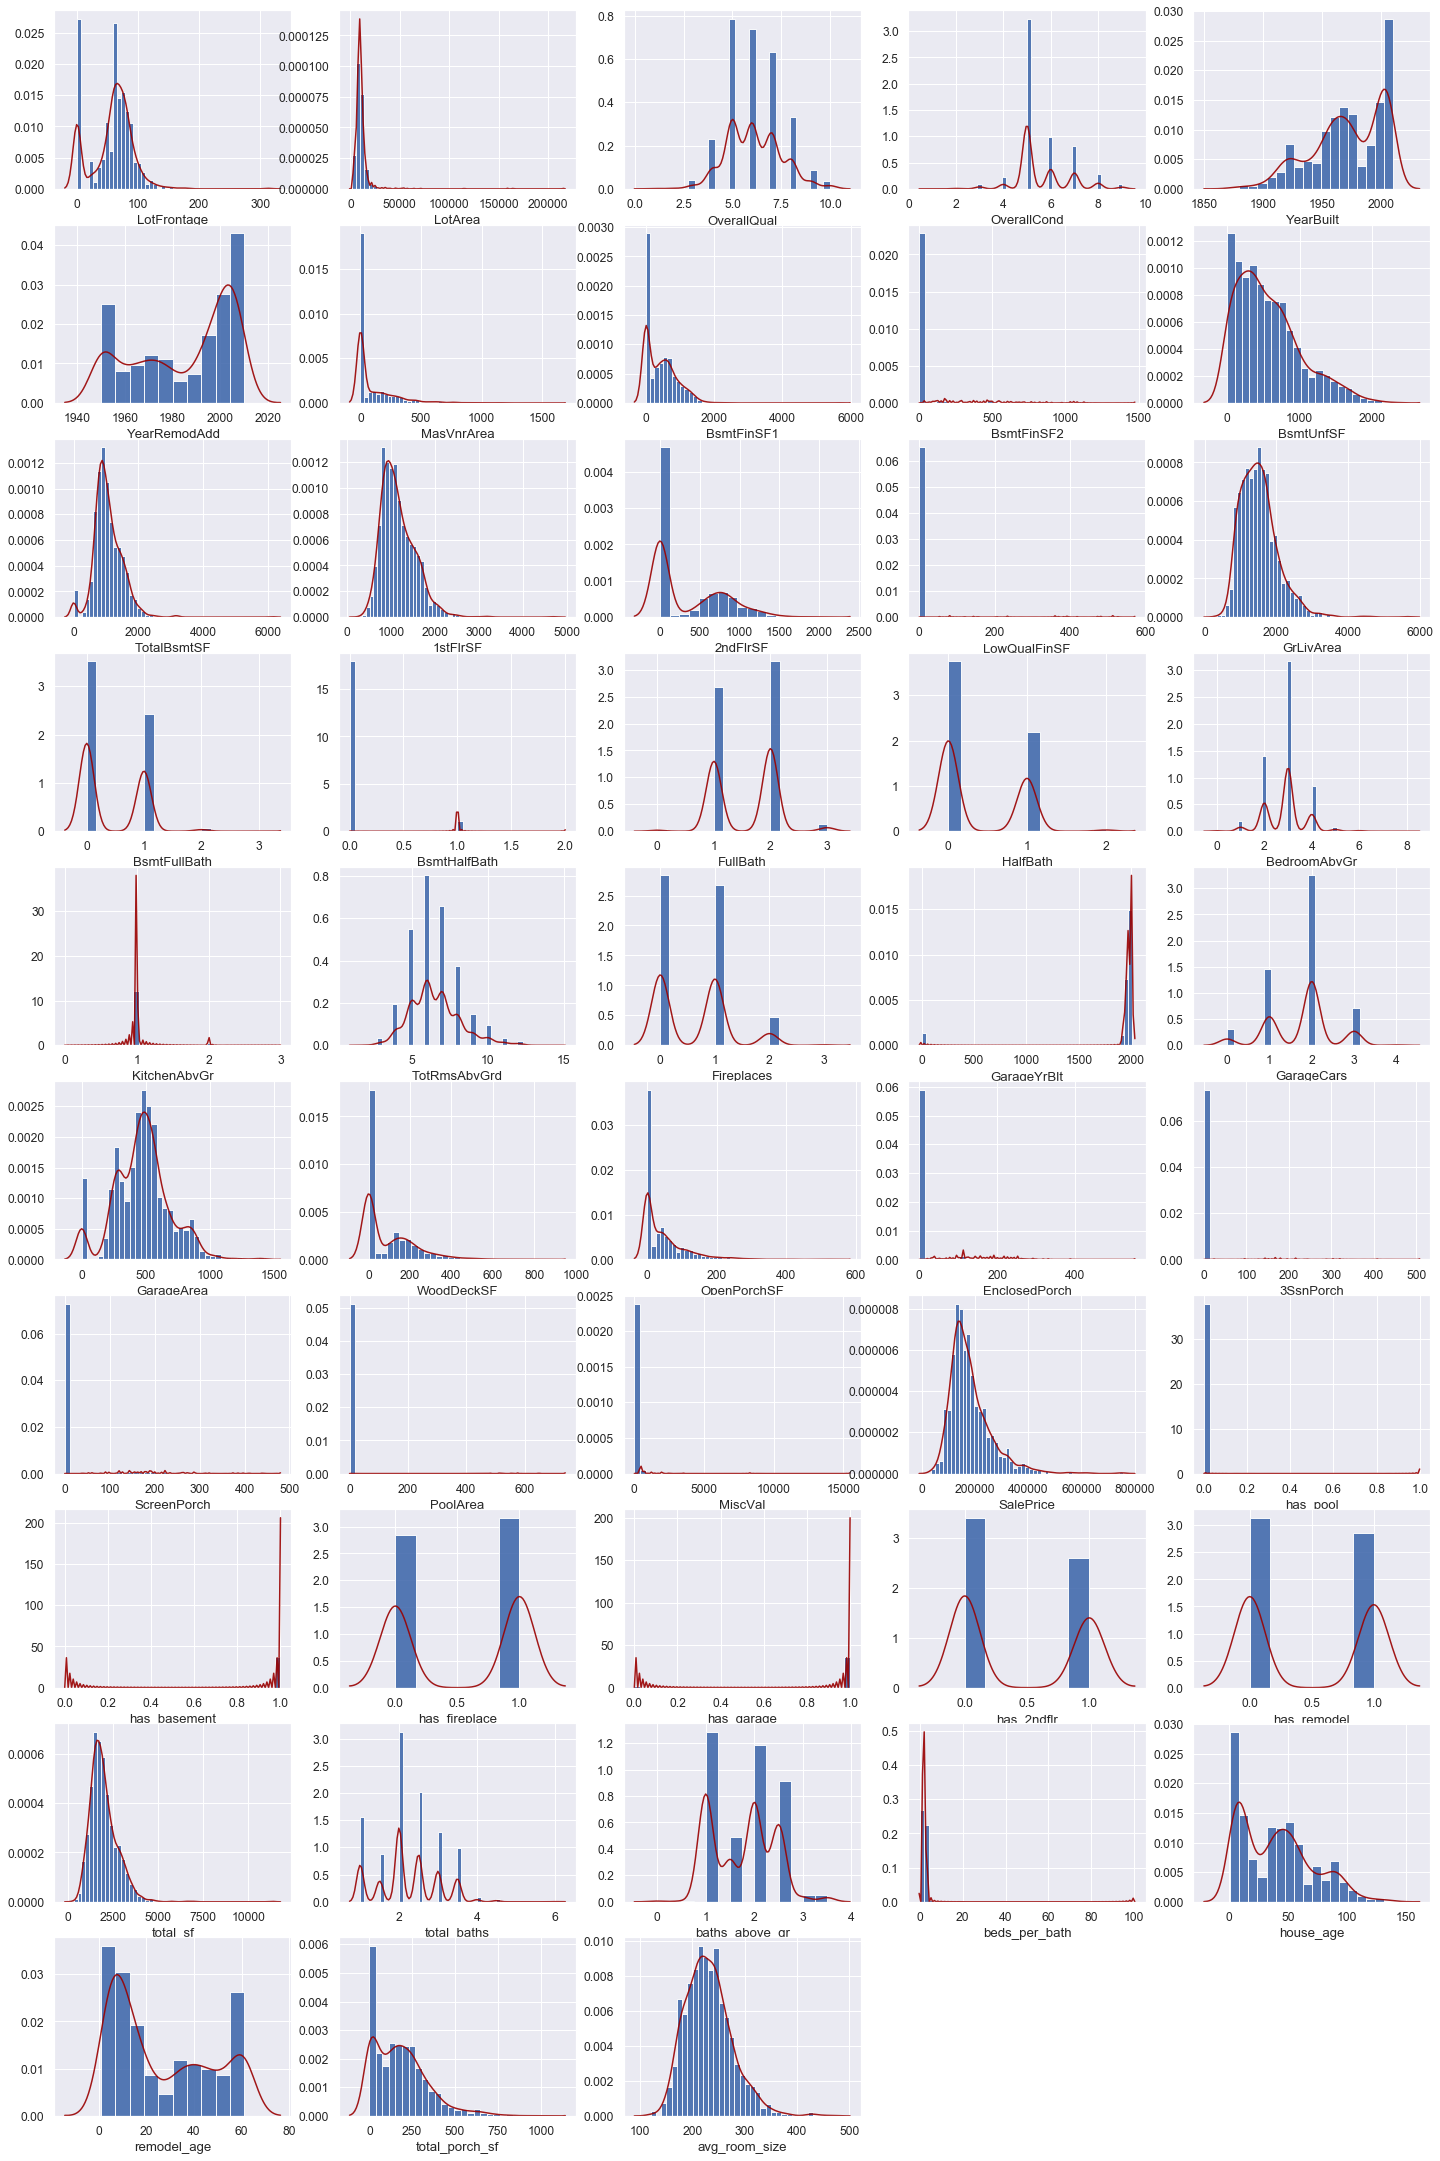

In [786]:
# Show the distribution plots for numerical features.
fig, axes = plt.subplots(figsize=(20,30))
fig.tight_layout()
cell_no = 1
for column_name in numerical_cols.columns:     
    plt.subplot(10, 5, cell_no)
    sns.distplot(numerical_cols[column_name], hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9},label=column_name)
    cell_no+=1

Based on the above plots, some possible features to consider performing a log transformation on or exclude outliers:  
- *LotFrontage*
- *LotArea*  
- *TotalBsmtSF*  
- *1stFlrSF*  
- *GrLivArea*  
- *SalePrice*  

We will do further analysis using scatter plots.

#### 2.4 Target Feature ('Sale Price') Analysis<a name="TargetFeatureAnalysis"></a> 

Let us understand the distribution of our target variable "Sale Price"

In [787]:
# Basic Descriptive statistics of SalePrice
print('Stats on Sale Price:')
pd.DataFrame(round(train.SalePrice.describe(),2))

Stats on Sale Price:


,SalePrice
count,1460.0
mean,180921.2
std,79442.5
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


Text(0.5, 1.0, 'Probability Plot')

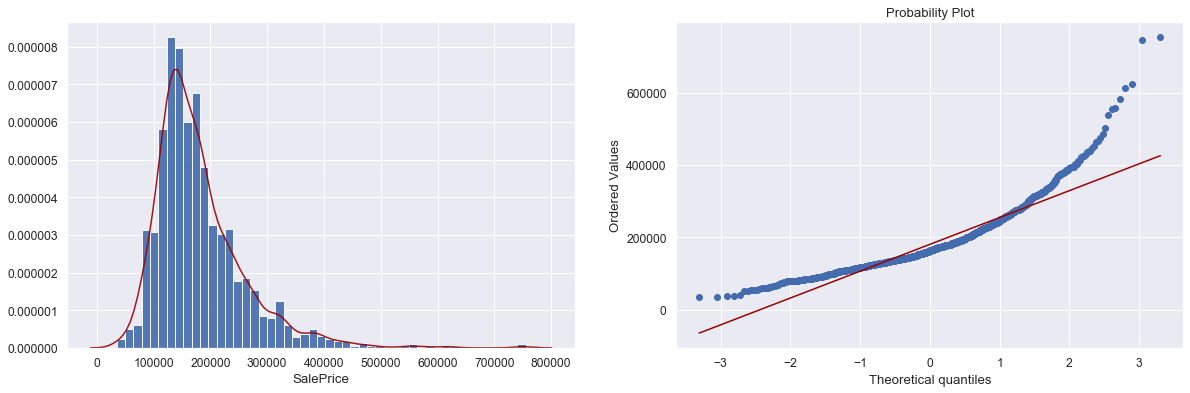

In [788]:
# Plot the Sale Price distribution
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
sns.distplot(train_new['SalePrice'], hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9});
ax2 = fig.add_subplot(122)
plt.title("Distribution")
stats.probplot(train['SalePrice'], plot=ax2);
ax2.get_lines()[0].set_color(base_color)
ax2.get_lines()[1].set_color(red_color)
plt.title("Probability Plot")

From the above plot, we can say that our target feature *SalePrice* deviates from the Normal distribution. It has a right skewed (positively skewed) distribution. So, we will log transform *SalePrice* which might reduce the skewed distribution. 

Text(0.5, 1.0, 'Probability after Log transformation')

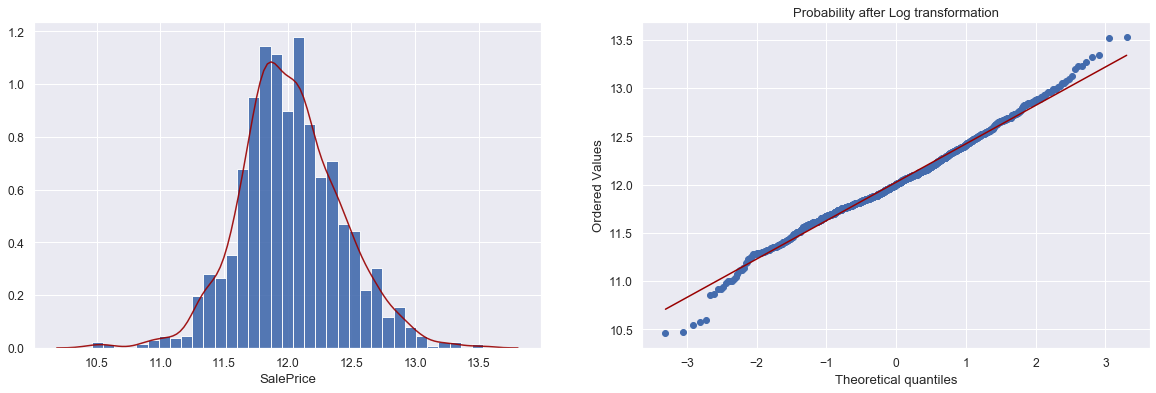

In [789]:
#Apply log transformation to SalePrice Outcome variable
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
sns.distplot(np.log(train_new['SalePrice']),   hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9})

ax2 = fig.add_subplot(122)
plt.title("Distribution after Log transformation")
stats.probplot(np.log(train_new['SalePrice']), plot=ax2);
ax2.get_lines()[0].set_color(base_color)
ax2.get_lines()[1].set_color(red_color)
plt.title("Probability after Log transformation")

The distribution of *SalePrice* looks Normal after log transformation. It gives more confidence as normally distributed *SalePrice* helps in better modeling the relationship between *SalePrice* and the predictor variables.  

Since, we did log transformation of our target feature *SalePrice*, the final predicted value will be different and we have to do the inverse operation for the correct *SalePrice* prediction.

#### 2.5 Target Feature *SalePrice* Vs. Predictors Analysys<a name="TargetFeatureVsPredictors"></a> 

Plot each feature against *SalePrice* to see the general correlation, get an idea of the strength of the correlation, and identify outliers. 

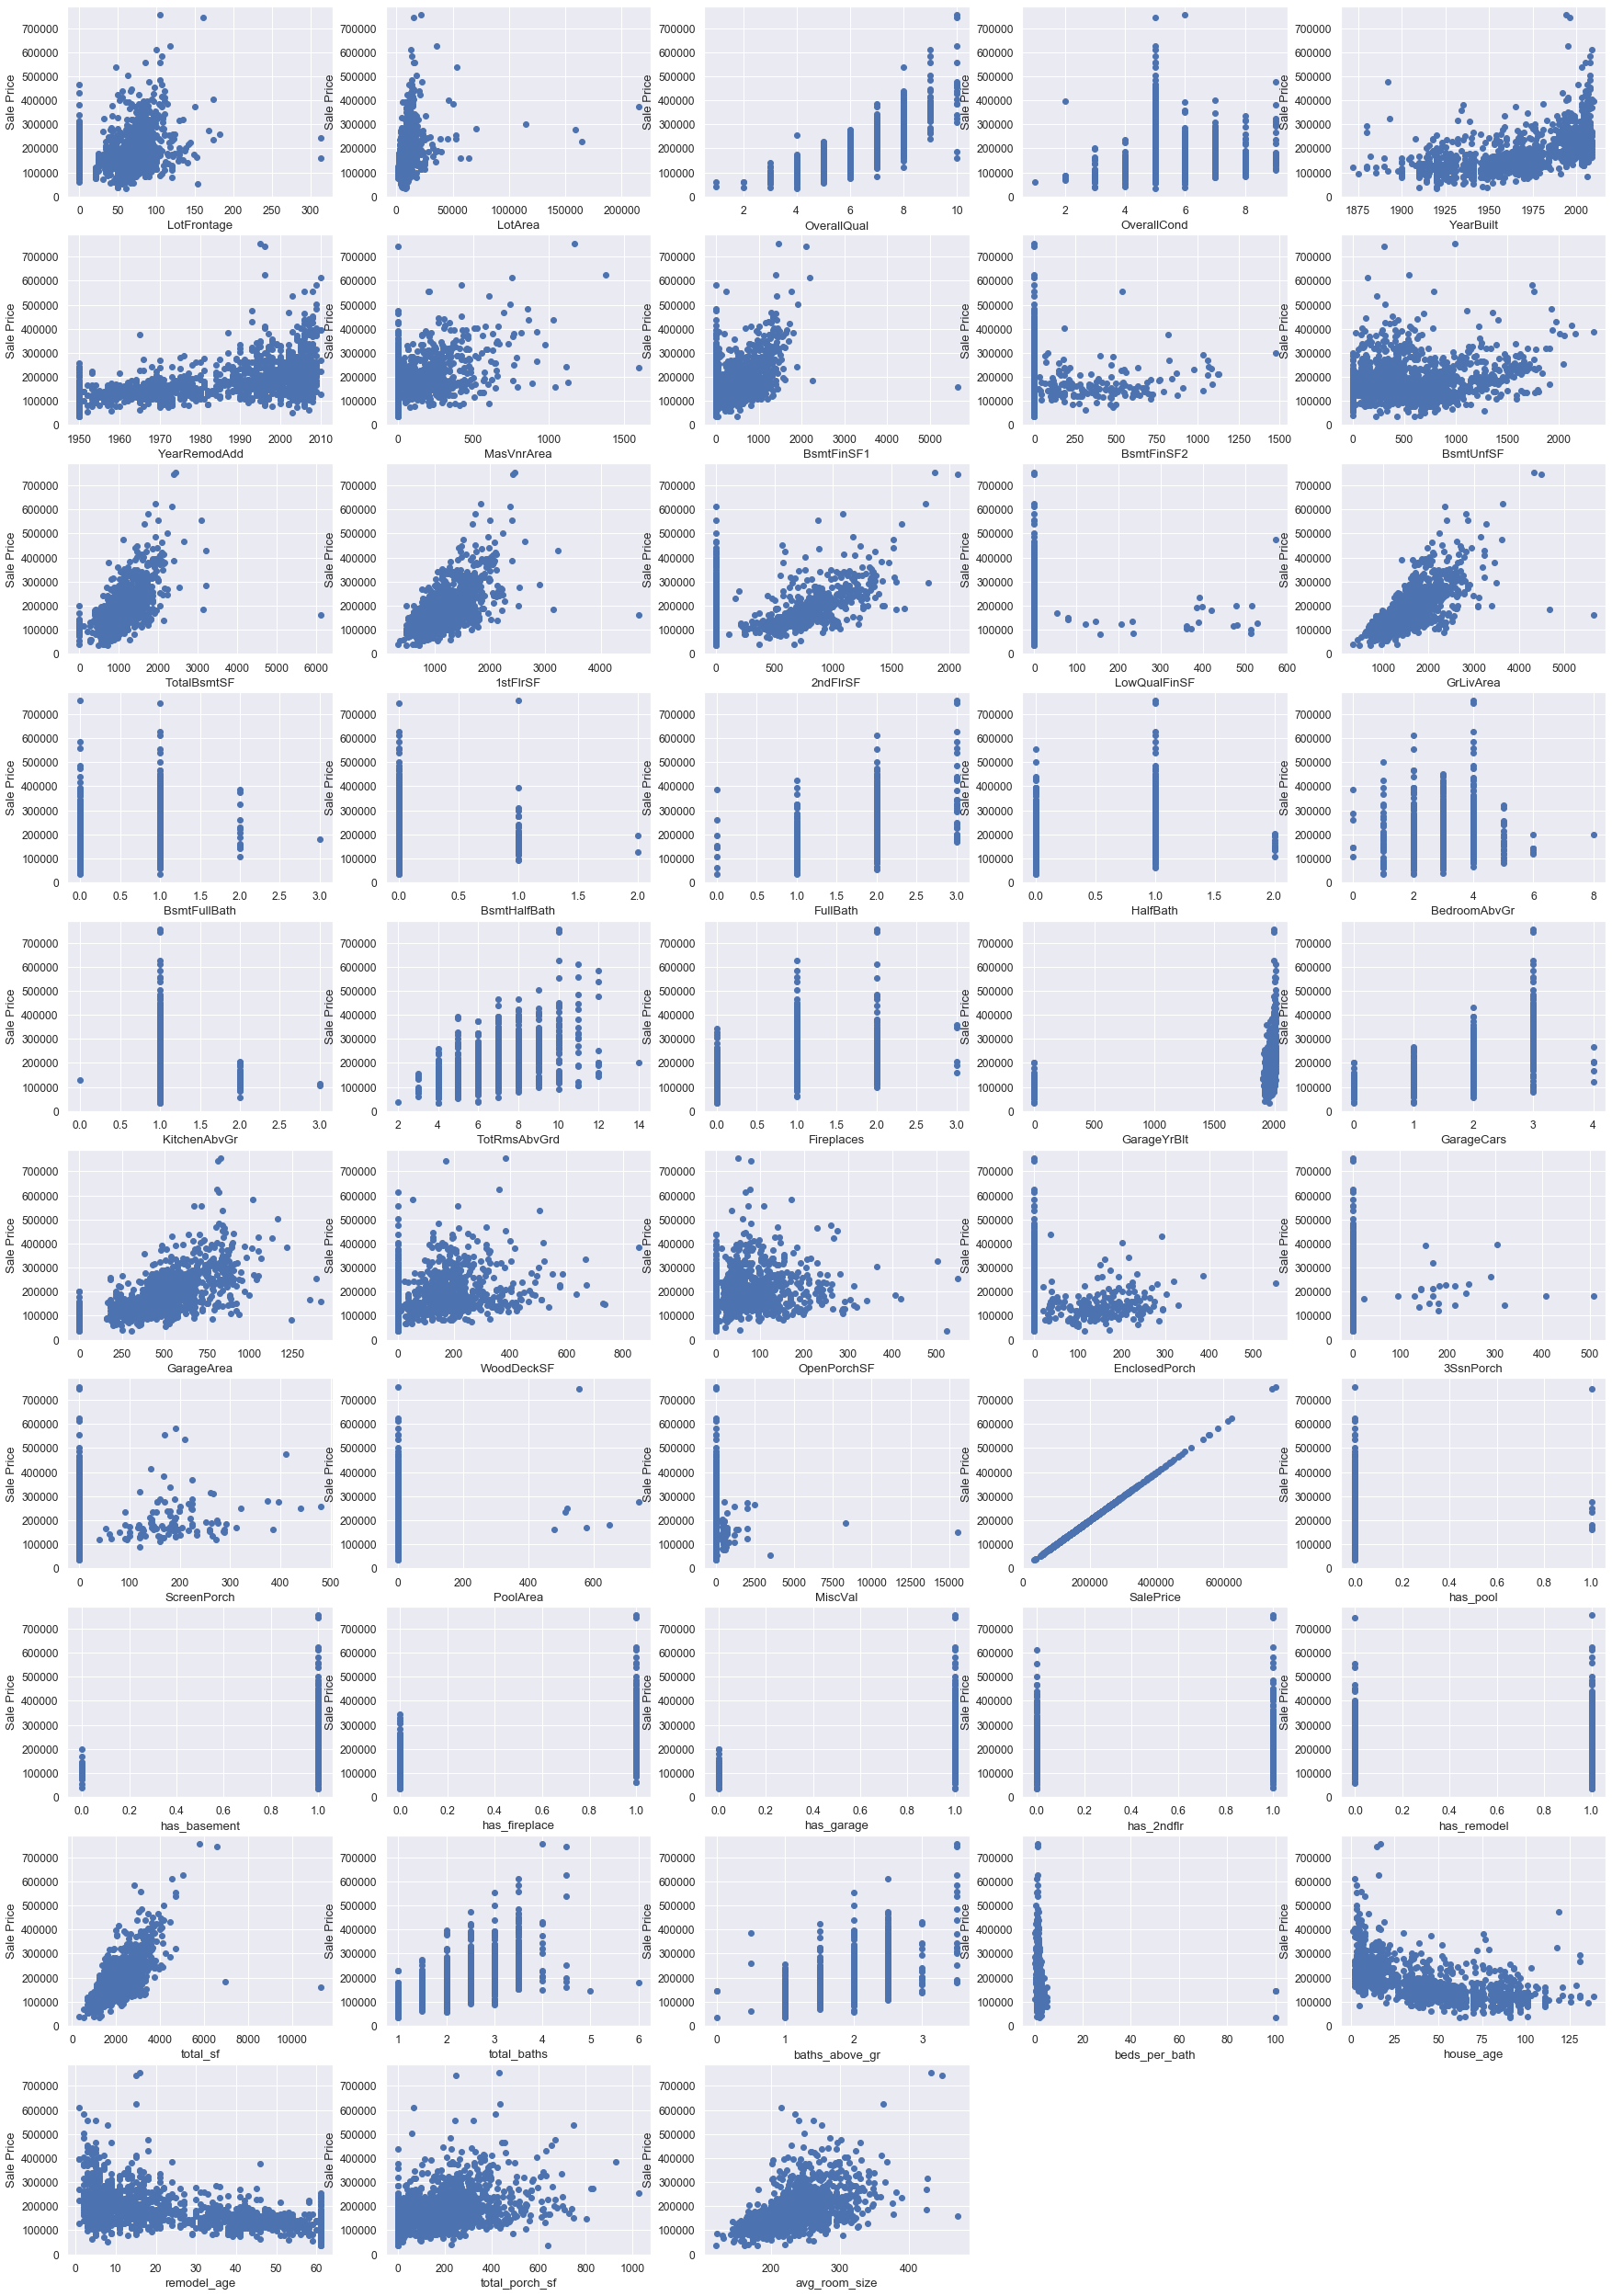

In [790]:
plt.figure(figsize=(30, 45))
cell_no = 1
for col in numerical_cols.columns:  
    scatter = plt.subplot(10, 5, cell_no)
    plt.scatter(train_new[col], train_new["SalePrice"], color = 'b')
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    cell_no+=1
plt.show()

We can see some possible outliers in the following:  

- *LotFrontage*
- *LotArea* 
- *TotalBsmtSF* 
- *1stFlrSF*
- *GrLivArea* 
- *SalePrice*

We can also see some features as possible ones to exclude (not a strong correlation with *SalePrice*):  

- *BsmtFullBath* 
- *BedroomAbvGd*

#### 2.5.1 Specific Feature Analysys<a name="SpecificFeatureAnalysys"></a> 

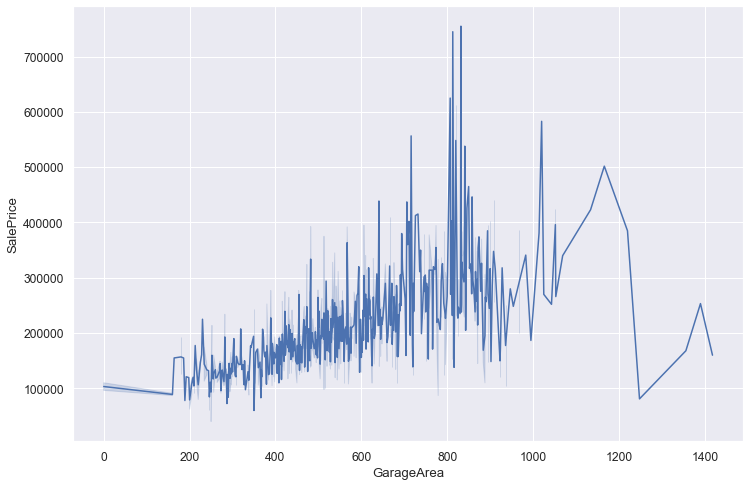

In [791]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='GarageArea', y='SalePrice', data=train)

Looking closely at *GarageArea*, we see an interesting dip in sale price at around 1200, which we speculate is because it was likely an apartment building with a parking garage (would be associated with lower sale price?)

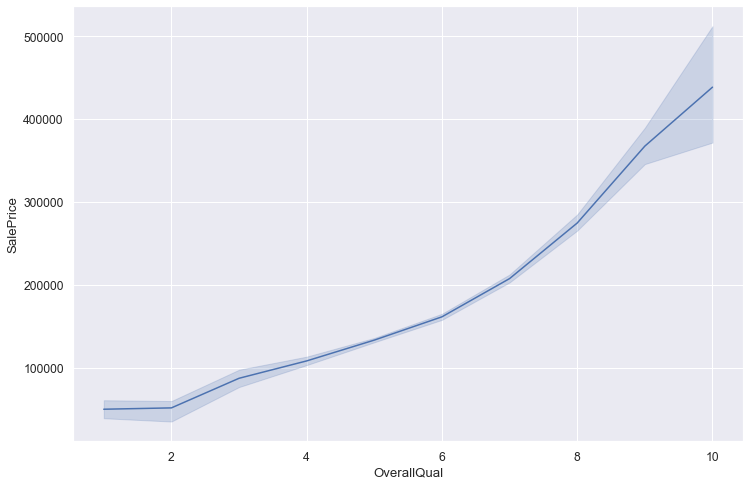

In [792]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='OverallQual', y='SalePrice', data=train)

We can see the strong correlation of *OverallQual* (overall quality) and *SalePrice*, which makes intuitive sense.

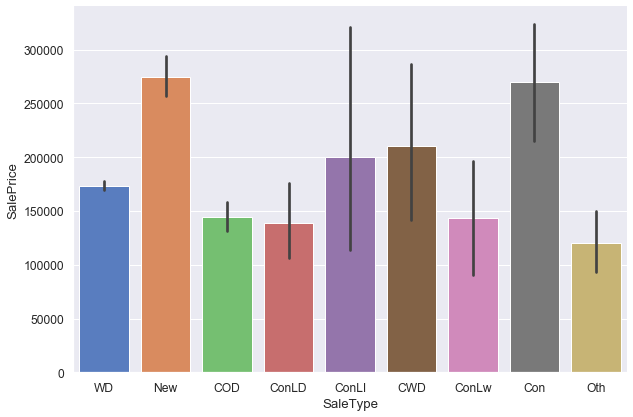

In [793]:
sns.catplot(x='SaleType', y='SalePrice', data=train, kind='bar', palette='muted',  height=6, aspect=1.5)

Originally, we were only including *SaleType_New* in our model, but after looking closer into the possible correlations between *SaleType* and *SalePrice*, we decided to include all SaleTypes.

#### 2.6 Columns Exclusion<a name="ColumnsExclusion"></a> 

Before we performed hot encoding, we excluded the following columns:  
*PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage*  
<br> After hot encoding and manually selecting our features (below), we no longer need to specify columns to exclude. 
<br> Here was our original code for reference: 

From section 2.1 there are 6 features above 10% NA. Let us drop them. Most of them are above 50% NA  

```
excluded_columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']

train_new= train_new.drop(excluded_columns, axis=1)
test_new= test_new.drop(excluded_columns ,axis=1)
```


#### 2.7  Outliers Exclusion<a name="OutliersExclusion"></a> 

Take a closer look at the possible outliers:

In [794]:
display(numerical_cols.describe().transpose())


,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.000000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.000000,2010.000000
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.250000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.250000,5644.000000
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.000000,1474.000000
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.000000,2336.000000


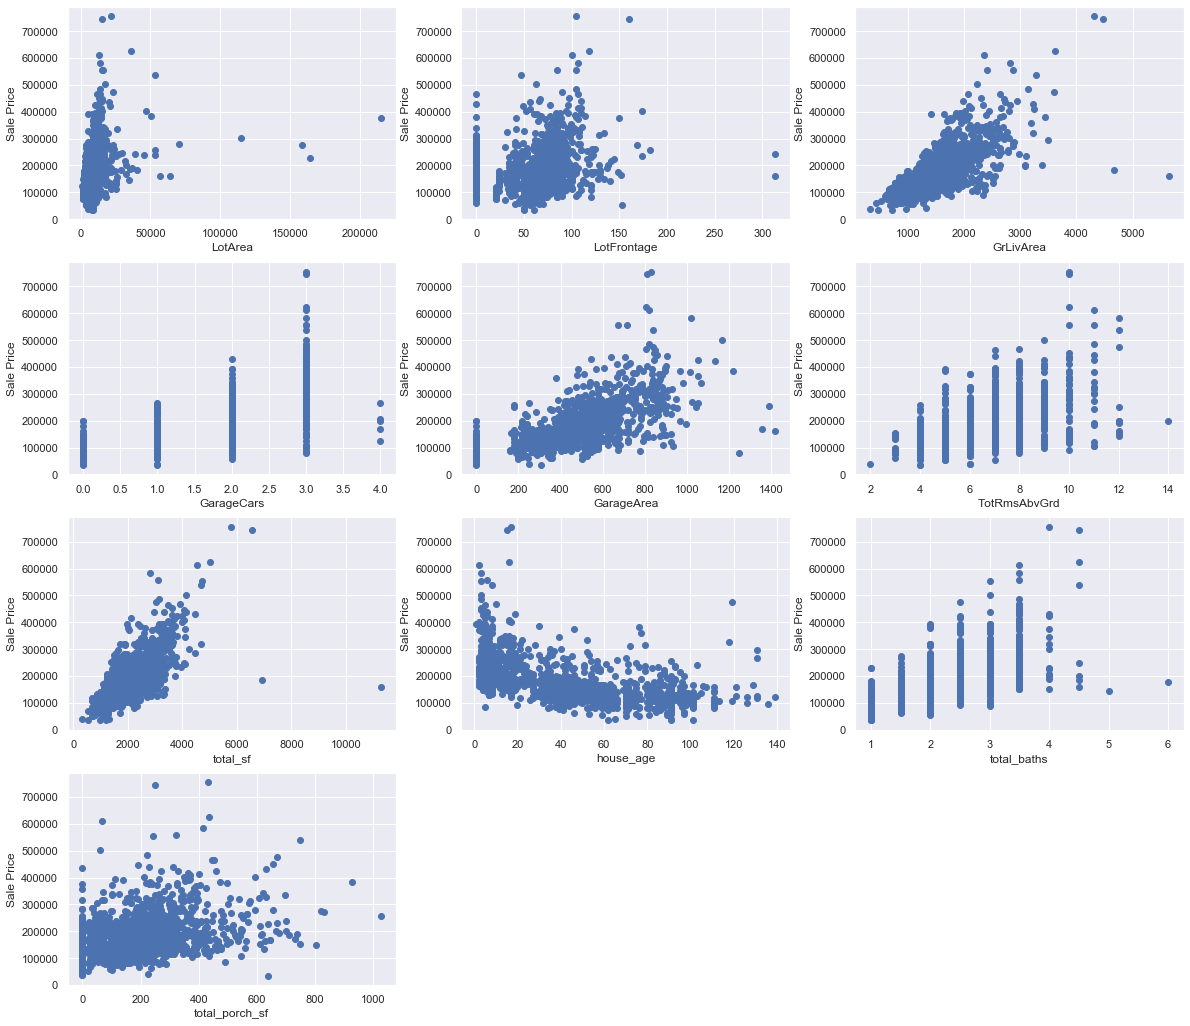

In [795]:
def outlier_plots(data):
    plt.figure(figsize=(20, 18))
    sns.set(font_scale=1)
    outlier_columns = [
        'LotArea',
        'LotFrontage',
        'GrLivArea',
        'GarageCars',
        'GarageArea',
        'TotRmsAbvGrd',
        'total_sf',
        'house_age',
        'total_baths',
        'total_porch_sf'
       
    ]

    n = 1
    for col in outlier_columns:  
        scatter = plt.subplot(4, 3, n)
        plt.scatter(data[col], data["SalePrice"], color = 'b')
        plt.xlabel(col)
        plt.ylabel("Sale Price")
        n+=1
    plt.show()

# print the plots that showed outliers
outlier_plots(train_new)

Our original strategy for dealing with outliers was just to remove them. While this strategy seemed to improve our model we realized that we may be excluding valuable data using the method. We then explored patching the outliers with the sample medians. This method helped to drive down our overall RMSE score. In addition to patching outlier values with the sample medians we also performed a log transformation on various columns. Ultimately, log transforming LotFrontage, LotArea, house_age, and total_sf resulted in the best performance.

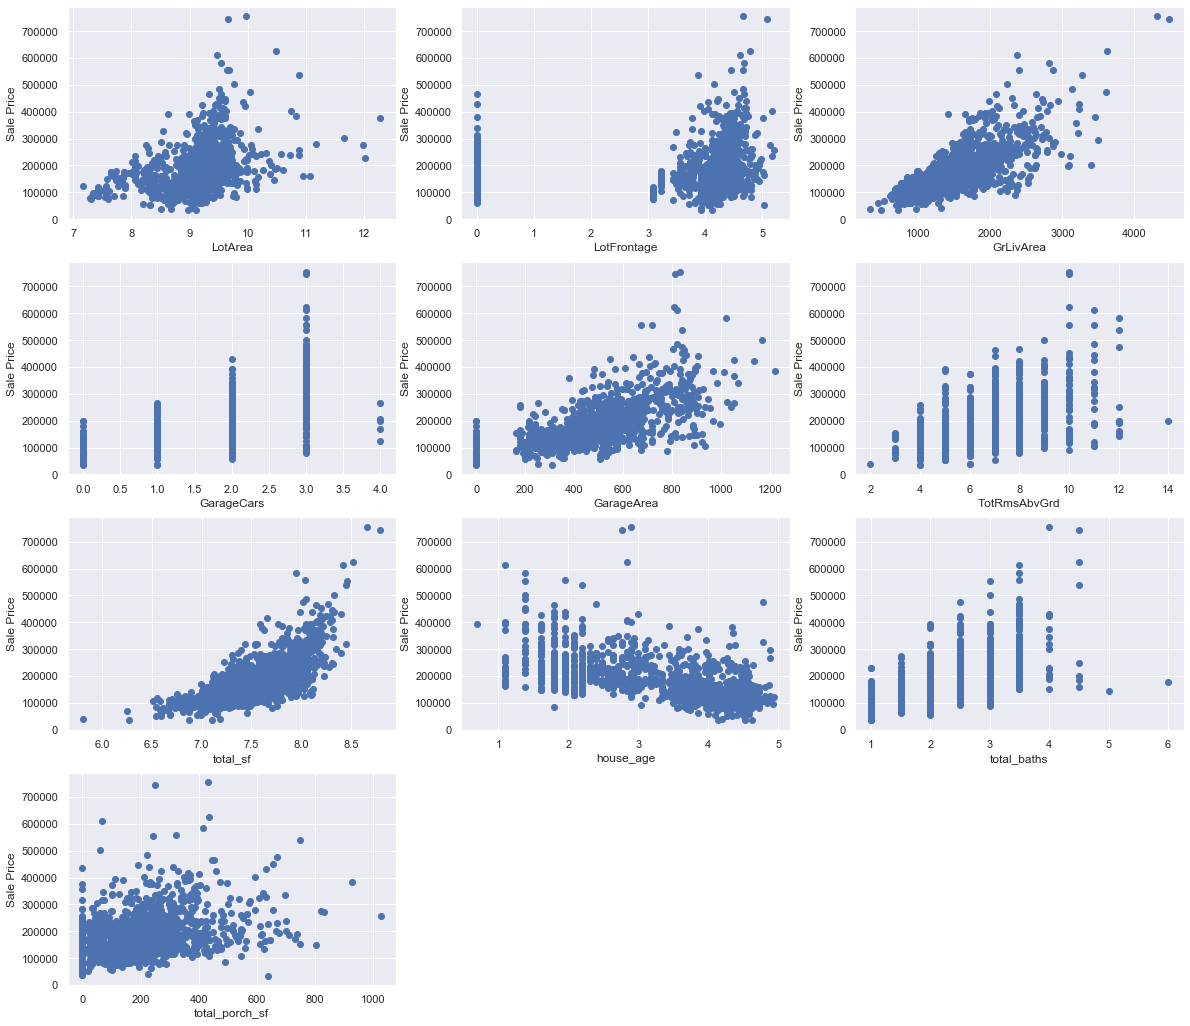

In [796]:
train_cleaned = train_new.copy(deep=True)
test_cleaned = test_new.copy(deep=True)

# remove identified outliers
# train_cleaned = train_cleaned.drop(train_cleaned[(train_cleaned.GrLivArea>4000) & (train_cleaned.SalePrice<200000)].index)
# train_cleaned = train_cleaned.drop(train_cleaned[(train_cleaned.LotArea>50000)].index)
# train_cleaned = train_cleaned.drop(train_cleaned[(train_cleaned.LotFrontage>200)].index)
# train_cleaned = train_cleaned.drop(train_cleaned[(train_cleaned.total_sf>6500)].index)

# convert identified outliers
gr_liv_median = train_cleaned[(train_cleaned.SalePrice>175000) & (train_cleaned.SalePrice<225000)]['GrLivArea'].median()
train_cleaned.loc[(train_cleaned.GrLivArea>4000) & (train_cleaned.SalePrice<200000), 'GrLivArea'] = gr_liv_median

total_sf_median = train_cleaned[(train_cleaned.SalePrice>175000) & (train_cleaned.SalePrice<225000)]['total_sf'].median()
train_cleaned.loc[(train_cleaned.total_sf>6000) & (train_cleaned.SalePrice<200000), 'total_sf'] = total_sf_median

train_cleaned.loc[train_cleaned.LotFrontage>200, 'LotFrontage'] = train_cleaned.LotFrontage.median()
train_cleaned['LotFrontage'] = np.log(train_cleaned['LotFrontage'] + 1)
test_cleaned['LotFrontage'] = np.log(test_cleaned['LotFrontage'] + 1)

train_cleaned['LotArea'] = np.log(train_cleaned['LotArea'])
test_cleaned['LotArea'] = np.log(test_cleaned['LotArea'] + 1)

gr_area_median = train_cleaned[(train_cleaned.SalePrice>150000) & (train_cleaned.SalePrice<300000)]['GarageArea'].median()
train_cleaned.loc[(train_cleaned.GarageArea>1200) & (train_cleaned.SalePrice<300000), 'GarageArea'] = gr_area_median

train_cleaned['house_age'] = np.log(train_cleaned['house_age'] + 1)
train_cleaned['total_sf'] = np.log(train_cleaned['total_sf'] + 1)

test_cleaned['house_age'] = np.log(test_cleaned['house_age'] + 1)
test_cleaned['total_sf'] = np.log(test_cleaned['total_sf'] + 1)

# re-examine the plots
outlier_plots(train_cleaned)

#### 2.8  Data Split and Transform<a name="DataSplit"></a> 

Instead of splitting into train and development data, we have decided to use 5-fold Cross Validation. With our initial approach, we were not using all of the training data and dev data due to 80:20 split. Due to that, we were getting different results everytime we run the models. So, we decided to use Cross Validation. That way, we include all of the training data to get consistent results. This approach also minimizes overfitting and generally results in a less biased modeling.

In [797]:
#Remove SalePrice and use it as our label, log transform it to make it more normalized.
train_data_full, train_labels = train_cleaned.drop(columns="SalePrice"), np.log(train_cleaned.SalePrice)

#### 2.9 Feature Selection<a name="FeatureSelection"></a> 

Here, we select our features. Based on the correlation plots shown earlier and some features that make intuitive sense to include, we have iteratively changed our list of features that achieves a low RMSE while trying to balance overfitting. 

We originally attempted to choose the features with the highest correlation score from the spearman rank test and then manually add select features and observe the effect on our final RMSE score. Numerous hours and strategies were spent trying to identify the most relevant feature set possible. The basic strategy was to select features, run the models, and then identify which predicted home values deviated the most from the true value. We would then perform a manual analysis of these homes to identify potential gaps in our feature selection process that could account for this. After several iterations we greatly improved our RMSE score.  Unfortunately, we were also performed in model tuning and other feature enhancements at the same time and our final model performed the best by just selecting any feature with a spearman rank above 0.05.

Our features are as follows: 

In [798]:
features = []
for index, row in spearman_rank.iterrows():
    if row['Feature'] != 'SalePrice' and abs(row['Spearman Rank']) > 0.05:
        features.append(row['Feature'])
print(features)

['house_age', 'remodel_age', 'beds_per_bath', 'FireplaceQu_NA', 'BsmtQual_TA', 'GarageType_Detchd', 'MasVnrType_None', 'MSZoning_RM', 'Foundation_CBlock', 'LotShape', 'MSSubClass_30', 'GarageType_NA', 'Neighborhood_OldTown', 'Foundation_BrkTil', 'Electrical_FuseA', 'Neighborhood_Edwards', 'EnclosedPorch', 'HouseStyle_1.5Fin', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes', 'BsmtQual_NA', 'MSSubClass_50', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng', 'SaleType_WD', 'Fence_MnPrv', 'Alley_Grvl', 'Neighborhood_BrkSide', 'BsmtQual_Fa', 'KitchenAbvGr', 'Electrical_FuseF', 'SaleCondition_Abnorml', 'Foundation_Slab', 'RoofStyle_Gable', 'Condition1_Artery', 'Neighborhood_Sawyer', 'Neighborhood_MeadowV', 'Neighborhood_BrDale', 'MSSubClass_90', 'BldgType_Duplex', 'Exterior1st_AsbShng', 'OverallCond', 'MSZoning_C (all)', 'BsmtFinType2', 'MSSubClass_160', 'Exterior2nd_AsbShng', 'HouseStyle_1.5Unf', 'Condition1_Feedr', 'BldgType_2fmCon', 'Fence_GdWo', 'MSSu

In [799]:
train_data = train_data_full[features]
test_data = test_cleaned[features]

print('Features after columns update:',train_data_full.shape[1])
print('Selected features:',train_data.shape[1])

Features after columns update: 285
Selected features: 187


### 3. Model Building<a name="ModelBuilding"></a> 

#### 3.1 Data Leak Analysis<a name="DataLeakAnalysis"></a> 

We will check for any Test data leaked into Train data to make a few predictions easy:

In [800]:
train_temp = train
test_temp = test

test_temp['copy_index'] = test_temp.index

comparison_df = test_temp.merge(train_temp, indicator=True)
dups = comparison_df[comparison_df['_merge'] == 'both']
dups

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,has_pool,has_basement,has_fireplace,has_garage,has_2ndflr,has_remodel,total_sf,total_baths,baths_above_gr,beds_per_bath,house_age,remodel_age,total_porch_sf,avg_room_size,copy_index,SalePrice,_merge
0,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Ex,Y,SBrkr,520,623,80,1223,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2005.0,RFn,2.0,480.0,TA,TA,Y,0,166,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,0,1,0,1,1,0,1143.0,2.5,2.5,0.8,6,6,166,305.750000,2714,147400,both
1,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,970.0,970.0,GasA,Ex,Y,SBrkr,970,739,0,1709,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,0,1,0,1,1,0,1709.0,2.0,2.0,1.5,7,7,40,244.142857,2866,130000,both


Looks like there were two duplicate rows between test and train. We'll add a function to patch our prediction with the actual values.

In [801]:
def patch_leaked_test(data):
    print(data.loc[2714]['SalePrice'], " vs. 147400")
    print(data.loc[2866]['SalePrice'], " vs. 130000")

    data.loc[2714, 'SalePrice'] = 147400
    data.loc[2866, 'SalePrice'] = 130000

Print the data sizes

In [802]:
# Train data size
print('Train data size:',train_data.shape)

# Test data size
print('Test data size:',test_data.shape)

Train data size: (1460, 187)
Test data size: (1459, 187)


A better substitute for the 'KitchenQual' variable is the majority class, which is 3. Here, we perform this substitution:

In [803]:
# substituting with the majority class('TA' which has ordinal 3)
test_data['KitchenQual'].fillna(3, inplace = True) 

#### 3.2 Regression Models<a name="RegressionModels"></a> 

##### 3.2.1 Model Tuning<a name="ModelTuning"></a>

Before we build our models we need to determine the parameters what will result in the best performance for each model.

Create function to find best parameters:

In [804]:
def parameter_tuning(model, parameters):
    clf = GridSearchCV(
        model, parameters, cv=2,scoring='neg_mean_squared_error', n_jobs = -1)

    clf.fit(train_data,train_labels)

    print(clf.best_params_)
    print(np.sqrt(-clf.best_score_))

Since we are using Cross Validation (CV), the following function will perform 5 fold CV.

In [805]:
#Validation function
def cross_validation(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train_data)
    rmse= np.sqrt(abs(cross_val_score(model, train_data, train_labels, scoring="neg_mean_squared_error", cv = kf)))
    return(rmse)

Here, we build multiple regression models and perform regression analysis on each through looking at the RMSE.

In [806]:
models_rmse = {}

##### 3.2.2 Ridge Regression.

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm

In [807]:
rr = linear_model.Ridge()

parameters = {
    'alpha':[25, 15, 10, 5, 2, 1, 0.1, 0.01, 0.001]
}

# parameter_tuning(rr, parameters)

# Best parameters
# {'alpha': 10}
# 0.11178897491760659

In [808]:
rr_model = linear_model.Ridge(alpha=10)
rmse = cross_validation(rr_model)
print("RidgeRegression Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['RidgeRegression'] = rmse.mean()

RidgeRegression Model RMSE average of 5 fold CV: 0.11164060924725897


##### 3.2.3 Bayesian Ridge Regression
In the Bayesian viewpoint, we formulate linear regression using probability distributions rather than point estimates. The response, y, is not estimated as a single value, but is assumed to be drawn from a probability distribution. The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters.

In [809]:
br = linear_model.BayesianRidge()

parameters = {
    'tol': [0.01, 0.001, 0.0001], 
    'alpha_1': [1e-05, 1e-06, 1e-07], 
    'alpha_2': [1e-05, 1e-06, 1e-07],
    'lambda_1': [1e-05, 1e-06, 1e-07],
    'lambda_2': [1e-05, 1e-06, 1e-07]
}

# parameter_tuning(br, parameters)

# Best parameters
# {'tol': 0.01, 'lambda_2': 1e-05, 'alpha_1': 1e-05, 'alpha_2': 1e-07, 'lambda_1': 1e-07}
# 0.11210469929935318

In [810]:
br_model = linear_model.BayesianRidge(tol=0.01, alpha_1=1e-05, alpha_2=1e-07, lambda_1=1e-07, lambda_2=1e-05)
rmse = cross_validation(br_model)
print("BayesianRidge Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['BayesianRidge'] = rmse.mean()

BayesianRidge Model RMSE average of 5 fold CV: 0.11196057441777889


##### 3.2.4 LassoLars Regression
Lasso model fit with Least Angle Regression a.k.a. Lars. It is a Linear Model trained with an L1 prior as regularizer. Least-angle regression (LARS) is a regression algorithm for high-dimensional data. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

In [811]:
ll = linear_model.LassoLars()

parameters = {
    'alpha':[5, 2, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}

# parameter_tuning(ll, parameters)

# Best Parameters
# {'alpha': 0.0001}
# 0.11467136244669875

In [812]:
ll_model = linear_model.LassoLars(alpha=0.0001)
rmse = cross_validation(ll_model)
print("LassoLars Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['LassoLars'] = rmse.mean()

LassoLars Model RMSE average of 5 fold CV: 0.11492701929778885


##### 3.2.4 Automatic Relevance Determination Regression (ARD)
Bayesian ARD regression.

Fit the weights of a regression model, using an ARD prior. The weights of the regression model are assumed to be in Gaussian distributions. The estimation is done by an iterative procedures (Evidence Maximization)

In [813]:
ard = linear_model.ARDRegression()

parameters = {
    'tol': [0.01], 
    'alpha_1': [1e-05, 1e-06, 1e-07], 
    'alpha_2': [1e-05, 1e-06, 1e-07],
    'lambda_1': [1e-05, 1e-06, 1e-07],
    'lambda_2': [1e-05, 1e-06, 1e-07]
}

# parameter_tuning(ard, parameters)

In [814]:
ardr_model = linear_model.ARDRegression()
rmse = cross_validation(ardr_model)
print("ARDRegression Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['ARDRegression'] = rmse.mean()

ARDRegression Model RMSE average of 5 fold CV: 0.12441478186207174


##### 3.2.5 Elastic-net Regression

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

In [815]:
en = linear_model.ElasticNet()

parameters = {
    'alpha':[1, 0.1, 0.01, 0.001, 0.0001],
    'l1_ratio':[0, 0.25, 0.5, 0.75, 1],
    'tol':[0.1, 0.01, 0.001, 0.0001]
}

# parameter_tuning(en, parameters)

# Best parameters
# {'l1_ratio': 0.5, 'alpha': 0.001, 'tol': 0.01}
# 0.10969109484123775

In [816]:
en_model = linear_model.ElasticNet(alpha=0.001, tol=0.001, l1_ratio=0.5)
rmse = cross_validation(en_model)
print("Elastic Net Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['ElasticNet'] = rmse.mean()

Elastic Net Model RMSE average of 5 fold CV: 0.10954488344087096


##### 3.2.6 TheilSen Regression
TheilSenRegressor is comparable to the Ordinary Least Squares (OLS) in terms of asymptotic efficiency and as an unbiased estimator. In contrast to OLS, Theil-Sen is a non-parametric method which means it makes no assumption about the underlying distribution of the data. Since Theil-Sen is a median-based estimator, it is more robust against corrupted data aka outliers.

In [817]:
tr = linear_model.TheilSenRegressor(n_jobs=-1)

parameters = {
    'max_subpopulation':[5000.0, 10000.0, 15000.0],
    'max_iter':[150, 300, 450],
    'tol':[0.1, 0.01, 0.001, 0.0001]
}

# parameter_tuning(tr, parameters)

# Best parameters

In [818]:
trs_model = linear_model.TheilSenRegressor(n_jobs=-1)
rmse = cross_validation(trs_model)
print("TheilSenRegressor Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['TSR'] = rmse.mean()

TheilSenRegressor Model RMSE average of 5 fold CV: 0.1227853030156579


##### 3.2.7 Random Forest Regression
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [819]:
rf = RandomForestRegressor()

parameters = {
    'n_estimators':[100,250,300,500,800,1000],
    'max_depth': [8,16,32, 64]
}

# parameter_tuning(rf, parameters)

# Best Values
# {'max_depth': 32, 'n_estimators': 300}
#0.14472743575983982

In [820]:
#use best parameter from above to build our modesl
rfr_model   = RandomForestRegressor(n_estimators=500, max_depth=64)

rmse = cross_validation(rfr_model)
print("RandomForestRegressor Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['RandomForest'] = rmse.mean()

RandomForestRegressor Model RMSE average of 5 fold CV: 0.13748745850564972


##### 3.2.8 XGB Regression
Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a weak learner is one which is slightly better than random guessing.

XGB uses the tree ensemble model as its base model, which is a set of classification and regression trees (CART). Trees are grown one after another ,and attempts to reduce the misclassification rate are made in subsequent iterations.

In [821]:
#tuning hyper-parameter for XGB model, pick the best base estimator from above
xgb = XGBRegressor()
parameters = {'nthread':[8], 
              'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.03, 0.1, 0.3], 
              'max_depth': [5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,250,300,500,800],
              'base_estimator': [br_model]
             }

# parameter_tuning(xgb, parameters)

In [822]:
xgb_model = XGBRegressor(
    base_estimator=br_model,
    colsample_bytree=0.7,
    learning_rate= 0.03,
    max_depth = 5,
    min_child_weight= 4,
    n_estimators= 800,
    nthread= 4,
    objective= 'reg:squarederror',
    silent= 1, 
    subsample= 0.7
)

rmse = cross_validation(xgb_model)
print("XGBRegressor Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['XGB'] = rmse.mean()

XGBRegressor Model RMSE average of 5 fold CV: 0.11544531264371143


##### 3.2.9 AdaBoost Regression
An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [823]:
#tuning hyper-parameter for ada model, pick the best base estimator from above
ada = AdaBoostRegressor()

parameters = {
    'n_estimators': [100,250,300,500],
    'learning_rate': [0.01,0.03,0.05,0.1],
    'base_estimator': [rr_model]
}
# parameter_tuning(ada, parameters)

In [824]:
ada_model  = AdaBoostRegressor(
    base_estimator=rr_model,
    n_estimators=75,
    random_state=0,
    learning_rate=0.01
)

rmse = cross_validation(ada_model)
print("AdaBoostRegressor Model RMSE average of 5 fold CV:", rmse.mean())
models_rmse['AdaBoost'] = rmse.mean()

AdaBoostRegressor Model RMSE average of 5 fold CV: 0.11311532782797404


#### 3.3 Model Fitting<a name="ModelFitting"></a> 

In [825]:
# fit models using training data
br_model_fit   = br_model.fit(train_data, train_labels)
ll_model_fit   = ll_model.fit(train_data, train_labels)
ardr_model_fit = ardr_model.fit(train_data, train_labels)
en_model_fit   = en_model.fit(train_data, train_labels)
trs_model_fit  = trs_model.fit(train_data, train_labels)
rr_model_fit   = rr_model.fit(train_data, train_labels)
rfr_model_fit  = rfr_model.fit(train_data, train_labels)
ada_model_fit  = ada_model.fit(train_data, train_labels)

In [826]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.33, random_state=7)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model_fit  = xgb_model.fit(
    X_train, 
    y_train, 
    early_stopping_rounds=10, # prevent over fitting
    eval_metric="rmse", 
    eval_set=eval_set, 
    verbose=False
)

We assigned different weights to models based on the RMSE values to improve the accuracy and created a blended/averged model. The blended model takes the models and the corresponding weights and does the prediction. 

In [827]:
sorted_models = sorted(models_rmse.items(), key = 
             lambda kv:(kv[1], kv[0]))
for item in sorted_models:
    if item[0] == 'Blended':
        continue
    print ('{:>18}  {:>12}'.format(item[0], item[1]))
    
regression_models = {
    'AdaBoost': {'weight': 0.125, 'model': ada_model_fit},
    'XGB': {'weight': 0.1, 'model': xgb_model_fit},
    'BayesianRidge': {'weight': 0.125, 'model': br_model_fit},    
    'RidgeRegression': {'weight': 0.125, 'model': rr_model_fit},
    'TSR': {'weight': 0.125, 'model': trs_model_fit},
    'RandomForest': {'weight': 0.025, 'model': rfr_model_fit},    
    'ARDRegression': {'weight': 0.125, 'model': ardr_model_fit},
    'ElasticNet': {'weight': 0.125, 'model': en_model_fit},    
    'LassoLars': {'weight': 0.125, 'model': ll_model_fit},
}

        ElasticNet  0.10954488344087096
   RidgeRegression  0.11164060924725897
     BayesianRidge  0.11196057441777889
          AdaBoost  0.11311532782797404
         LassoLars  0.11492701929778885
               XGB  0.11544531264371143
               TSR  0.1227853030156579
     ARDRegression  0.12441478186207174
      RandomForest  0.13748745850564972


#### 3.4 Blended Model<a name="BlendedModel"></a> 

In [828]:

# run a prediction with blended regression models
def blend_models_predict(data):
    predict = []
    for key in regression_models:
        model = regression_models[key]
        if len(predict) == 0:
            predict = model['weight'] * model['model'].predict(data)
        else:
            predict += model['weight'] * model['model'].predict(data)
    
    return predict

# run a prediction with blended regression models
def models_predict():
    predict = []
    for key in regression_models:
        model = regression_models[key]
        predict = model['model'].predict(train_data)
        predict = np.exp(predict)
        train_labels_blended = np.exp(train_labels)
        rmse = np.sqrt(mean_squared_log_error(train_labels_blended, predict))
        print(key, "Model RMSE:", rmse)

def blend_rmse():
    predict = blend_models_predict(train_data)
    predict = np.exp(predict)
    train_labels_blended = np.exp(train_labels)
    return np.sqrt(mean_squared_log_error(train_labels_blended, predict))

models_rmse['Blended'] = blend_rmse()
print("Blended Model RMSE:", models_rmse['Blended'])

Blended Model RMSE: 0.09252312961586445


In [829]:
models_predict()

AdaBoost Model RMSE: 0.09608494473694387
XGB Model RMSE: 0.07959646944589206
BayesianRidge Model RMSE: 0.09822805010458686
RidgeRegression Model RMSE: 0.09704075935359183
TSR Model RMSE: 0.11239677678475013
RandomForest Model RMSE: 0.04999934057578831
ARDRegression Model RMSE: 0.10886456108439654
ElasticNet Model RMSE: 0.09899489974241456
LassoLars Model RMSE: 0.10470791680632854


#### 3.5 Models Comparison<a name="ModelsComparison"></a> 

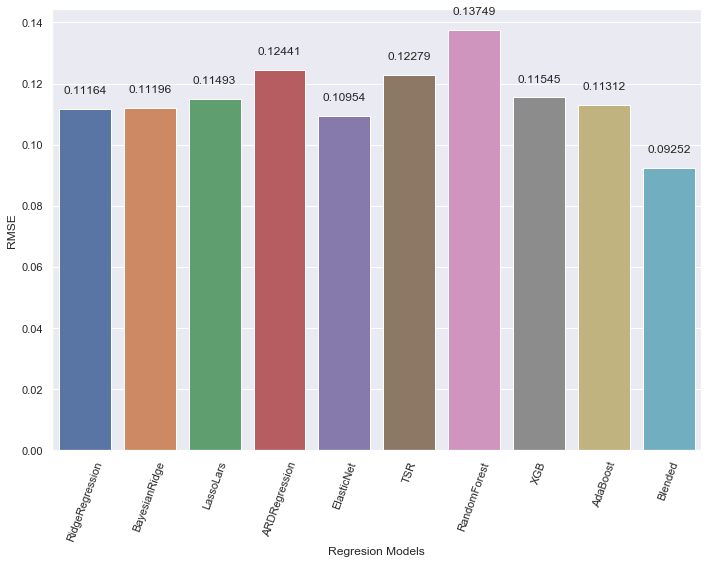

In [830]:
#RMSE comparison
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
rmse_values_list = list(models_rmse.values())
g=sns.barplot(x=list(models_rmse.keys()), y=rmse_values_list, ax=ax, palette="deep")
# Show values
x_val = 0
for i,rmse_value in enumerate(rmse_values_list):
    ax.text(x = x_val, y = rmse_value+0.005, s = round(rmse_value,5), ha="center") 
    x_val = x_val + 1.0
plt.xlabel('Regresion Models')
plt.ylabel('RMSE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

#### 3.6 Predict Home Prices<a name="PredictHomePrices"></a> 

In [831]:
test_data[pd.isnull(test_data['Functional'])]['OverallCond']

Id
2217    5
2474    1
Name: OverallCond, dtype: int64

In [832]:
test_data[test_data['OverallCond'] == 1]['Functional'].median()

4.0

In [833]:
test_data[test_data['OverallCond'] == 5]['Functional'].median()

8.0

In [834]:
# Patch the "Functional" feature in test using the median of overall quality
test_data.loc[2217, 'Functional'] = 8
test_data.loc[2474, 'Functional'] = 4

In [835]:
# predict home prices using blended regression model

test_predict = blend_models_predict(test_data)
prices = np.exp(test_predict)
predicted = test_data.copy()
predicted['SalePrice'] = prices
predicted = predicted[['SalePrice']]

In [836]:
# fix our predictions on leaked data and write to CSV
patch_leaked_test(predicted)
predicted.to_csv(r'./house-prices-data/test_predicted.csv')

predicted.head()

153643.08225068555  vs. 147400
138035.5046134806  vs. 130000


,SalePrice
Id,
1461,122171.295678
1462,159446.081607
1463,183007.081342
1464,198648.898319
1465,192210.137053


### 4. Summary<a name="Summary"></a> 

From the beginning, our focus was more on ***'know your data'***. We took the following iterative approach to improve the accuracy of *SalePrice* prediction:  
- Replace the missing data appropriately based on the features and create new features by aggregating some of the features.
- For categorical features, assign values to ordinal data and hot encode the data.
- Apply log transformation on target feature *SalePrice* and other skewed features.
- Remove outliers after thorough analysis of the features and the corresponding data.
- Feaure selection is done after a) correlation analysis of the features with the target feature *SalePrice* and b) analysis of multicollinearity among the features.
- Test with multiple machine learning algorithms focusing on handling multicollinearity issues.
- Analyze the models RMSE values, fine tuned the weights and utilize the blended model.

Repeating the above process  greatly improved our accuracy of house price predictions as measured by the RMSE. 

Beginning from a Kaggle placement of 3500, we have worked our way up to a placement of 525. 

<br> Some further extensions of our model would include: 
<br> 1. Perfect the combination of manual feature selection and using L1 and L2 regularization to achieve the lowest possible RMSE without the issue of overfitting of our train data. 
<br> 2. Use a combination of LabelEncoder and One Hot Encoding to achieve a more representative display of categorical features. 
<br> 3. Iteratively perform log transforms on skewed features (we began this process, but did not see significant improvement of RMSE). 

### 5. References<a name="References"></a> 

[1]&nbsp;&nbsp;<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">House Prices: Advanced Regression Techniques</a><br>
[2]&nbsp;&nbsp;<a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.556.7571&rep=rep1&type=pdf">The problem of Overfitting - Douglas M. Hawkins</a><br>
[3]&nbsp;&nbsp;<a href="https://scikit-learn.org/stable/modules/cross_validation.html">Cross-validation: evaluating estimator performance</a><br>
[4]&nbsp;&nbsp;<a href="https://machinelearningmastery.com/data-leakage-machine-learning/">Data Leakage in Machine Learning</a><br>
[5]&nbsp;&nbsp;<a href="https://cseweb.ucsd.edu/~yfreund/papers/IntroToBoosting.pdf">Boosting - Yoav Freund & Robert E.Schapire</a><br>
[6]&nbsp;&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html">Bayesian ridge regression</a><br>
[7]&nbsp;&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html">Lasso model</a><br>
[8]&nbsp;&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html">Bayesian ARD regression</a><br>
[9]&nbsp;&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveRegressor.html">Passive Aggressive Regressor</a><br>
[10]&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html">Theil-Sen Estimator</a><br>
[11]&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Ordinary least squares Linear Regression</a><br>
[12]&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">Random forest regressor</a><br>
[13]&nbsp;<a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html">XGB Regressor</a><br>
[14]&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html">Ada Boost Regressor</a><br>